# Importing all descriptors into dataframe

In [1]:
import pandas as pd

In [13]:
solvent_properties = pd.read_excel('pal-input.xlsx', sheet_name='solvent-properties', index_col=0)
polymer_properties = pd.read_excel('pal-input.xlsx', sheet_name='polymer-properties', index_col=0)
target_values = pd.read_excel('pal-input.xlsx', sheet_name='target-values')

merged_solvent = pd.merge(target_values, solvent_properties, on='Solvent-Label')
merged_final = pd.merge(merged_solvent, polymer_properties, on='Polymer-Label').dropna(axis=0)
df = merged_final
df.iloc[:,2:].to_csv('train.dat', sep=' ', header=True, index=False, mode='w')

In [10]:
d1_model = 0.005944374133 * (df['Polymer-orca-isotropic-quadrupole'] - df['Polymer-multiwfn-%polar-surface-area'])
d1_model

224    -1.879916
225    -1.879916
226    -1.879916
227    -1.879916
228    -1.879916
          ...   
7295   -1.562134
7296   -1.562134
7297   -1.562134
7298   -1.562134
7299   -1.562134
Length: 6920, dtype: float64

## How to filter a dataframe based on column name

In [17]:
filter_string = 'mordred'
columns_to_remove = [col for col in df.columns if filter_string in col]

df_cleaned = df.drop(columns=columns_to_remove)
# df_cleaned.iloc[:,2:].to_csv('train-no-mordred.dat', sep=' ', header=True, index=False, mode='w')

# Columns ordered for SISSO so that grouped units are (1:2)(3:4)(5:8)(9:12) where (13:15) are dimensionless
desired_order = ['Identifier', 'Target', 'Polymer-orca-isotropic-quadrupole', 'Solvent-orca-isotropic-quadrupole', 'Polymer-orca-isotropic-polarizability', 'Solvent-orca-isotropic-polarizability', 'Polymer-multiwfn-ESP-min', 'Polymer-multiwfn-ESP-max', 'Solvent-multiwfn-ESP-min', 'Solvent-multiwfn-ESP-max', 'Polymer-multiwfn-polarity-index', 'Solvent-multiwfn-polarity-index', 'Polymer-orca-vac-HOMOLUMO-gap', 'Polymer-orca-dimer-stabilization', 'Solvent-ref-dielectric-constant', 'Polymer-multiwfn-%polar-surface-area', 'Solvent-multiwfn-%polar-surface-area']
df_cleaned_reordered = df_cleaned[desired_order]
df_cleaned_reordered.to_csv('train-no-mordred.dat', sep=' ', header=True, index=False, mode='w')

# tSNE & DBSCAN

## Variation of perplexity parameter
### eDragon features with std > 0.1

In [2]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from sklearn.manifold import TSNE
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn import metrics
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn import metrics
# from sklearn.cluster import OPTICS

Text(0.5, 1.0, 'DBSCAN (eps=5, min_samples=20) \n tSNE perplexity=30 \n Silhouette score=0.47')

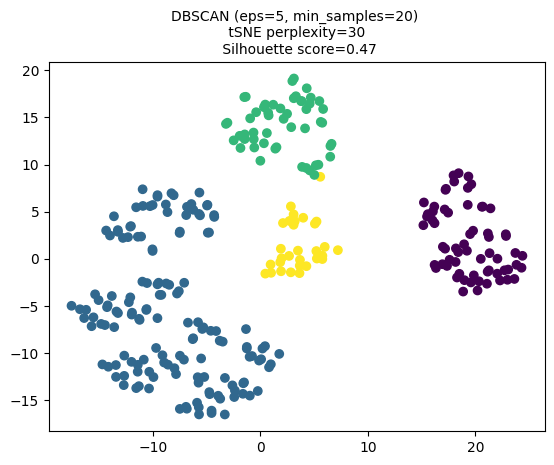

In [3]:
# features0p1 = pd.read_excel(
#     'pal-input.xlsx',
#     sheet_name='293 edragon-features 0p1',
#     header=0,
#     index_col=0,
#     # usecols="A:AA",
#     # nrows=324
# )

# features0p1.dropna(axis=0, inplace=True)

# features0p1 = StandardScaler().fit_transform(features0p1) # this is important!

# for i in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]:

#     tsne = TSNE(n_components=2, verbose=0, perplexity=i, n_iter=500)

#     tsne_results = tsne.fit_transform(features0p1)

#     if i == 30: # perplexity = 30 selected after seeing images from loop
#         tsne30 = tsne
#         tsne30_results = tsne_results

#     plt.scatter(tsne_results[:,0], tsne_results[:,1])
#     plt.title('tSNE Perplexity = {0}'.format(str(i)))
#     # plt.savefig('./tsne-perplexity-variation-images/edragon 0p1/scaled-tsne-{0}perp'.format(str(i))) # commented out to avoid image replacement
#     plt.clf()

# db = DBSCAN(eps=5, min_samples=20).fit(tsne30_results)

# silhouette_score = round(metrics.silhouette_score(tsne30_results, db.labels_), 2)

# plot_matrix = np.hstack((tsne30_results, db.labels_[:, np.newaxis]))

# plt.scatter(plot_matrix[:, 0], plot_matrix[:, 1], c=plot_matrix[:, 2])
# plt.title('DBSCAN (eps=5, min_samples=20) \n tSNE perplexity=30 \n Silhouette score={0}'.format(str(silhouette_score)),fontsize=10)
# # plt.savefig('./tsne-perplexity-variation-images/edragon 0p1/dbscan')

## It does not make sense to do tSNE and then DBSCAN since they both find clusters.
Useful instead to do DBSCAN on the full dimensional data

In [4]:
# # db = DBSCAN(eps=20, min_samples=10).fit(features0p1)
# optics_clustering = OPTICS(min_samples=10).fit(features0p1)
# # db.labels_
# optics_clustering.labels_

array([-1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [5]:
# # tsne50_results
# db = DBSCAN(eps=4, min_samples=20).fit(tsne40_results)
# # db.labels_
# silhouette_score = round(metrics.silhouette_score(tsne40_results, db.labels_), 2)

# plot_matrix = np.hstack((tsne40_results, db.labels_[:, np.newaxis]))
# plt.clf()
# plt.scatter(plot_matrix[:, 0], plot_matrix[:, 1], c=plot_matrix[:, 2])
# plt.title('DBSCAN (eps=5, min_samples=20) \n tSNE perplexity=50 \n Silhouette score={0}'.format(str(silhouette_score)),fontsize=10)

NameError: name 'tsne40_results' is not defined

# DBSCAN

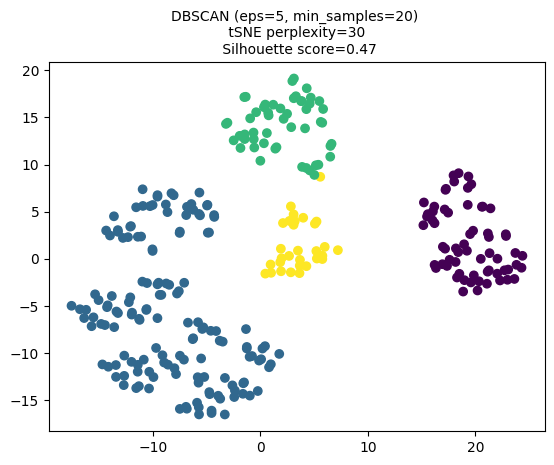

In [ ]:
# plt.scatter(plot_matrix[:, 0], plot_matrix[:, 1], c=plot_matrix[:, 2])
# plt.title('DBSCAN (eps=5, min_samples=20) \n tSNE perplexity=30 \n Silhouette score={0}'.format(str(silhouette_score)),fontsize=10)
# plt.savefig('./tsne-perplexity-variation-images/edragon 0p1/dbscan')

# Pearson downselect on Mordred data

In [24]:
# import pandas as pd
# import numpy as np

In [28]:
# mordred_data = pd.read_csv('./all-polymer-combos/features/mordred-downselect/mordred-raw.csv',index_col=0).dropna(axis=1)
# std_threshold = 1
# filtered_columns = mordred_data.columns[mordred_data.std() >= std_threshold]
# mordred_std_filtered = mordred_data[filtered_columns]

# nunique_threshold = 50
# mordred_nunique_filtered = mordred_std_filtered.loc[:, mordred_std_filtered.nunique() >= nunique_threshold]

# # mordred_nunique_filtered

# corr_matrix = mordred_nunique_filtered.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# mordred_nunique_filtered.drop(to_drop, axis=1, inplace=True)

# mordred_nunique_filtered = mordred_nunique_filtered.rename(columns=lambda x: 'Polymer-mordred-' + x)
# # mordred_nunique_filtered.to_excel('./all-polymer-combos/features/mordred-downselect/mordred-downselect.xlsx')

/var/folders/77/kkm5pwn11598h1sdpz_dthj00000gn/T/ipykernel_6350/1361430972.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mordred_nunique_filtered.drop(to_drop, axis=1, inplace=True)
